***TASK 1- Dataset Merging***

In [5]:
# Importing libraries

import pandas as pd
import os

***Loading Data***

In [6]:
# Loading both CSVs from the data folder
transactions_df = pd.read_csv("../data/customer_transactions.csv")
social_profiles_df = pd.read_csv("../data/customer_social_profiles.csv")

# Display the first 5 rows of each dataset
print("Transactions:")
display(transactions_df.head())

print("Social Profiles:")
display(social_profiles_df.head())


Transactions:


,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,Sports,2.3
1,192,1002,332,2024-01-02,Electronics,4.2
2,114,1003,442,2024-01-03,Electronics,2.1
3,171,1004,256,2024-01-04,Clothing,2.8
4,160,1005,64,2024-01-05,Clothing,1.3


Social Profiles:


,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,A178,LinkedIn,74,4.9,Positive
1,A190,Twitter,82,4.8,Neutral
2,A150,Facebook,96,1.6,Positive
3,A162,Twitter,89,2.6,Positive
4,A197,Twitter,92,2.3,Neutral


***Merging Data***

In [7]:
# Display column names
print(transactions_df.columns)
print(social_profiles_df.columns)

Index(['customer_id_legacy', 'transaction_id', 'purchase_amount',
       'purchase_date', 'product_category', 'customer_rating'],
      dtype='object')
Index(['customer_id_new', 'social_media_platform', 'engagement_score',
       'purchase_interest_score', 'review_sentiment'],
      dtype='object')


In [8]:
# Find matching customer IDs
set1 = set(transactions_df['customer_id_legacy'])
set2 = set(social_profiles_df['customer_id_new'])

intersection = set1.intersection(set2)
print(f"Matching customer IDs: {len(intersection)}")

Matching customer IDs: 0


In [9]:
# Merge datasets
import numpy as np

# Randomly assign a social profile to each transaction
social_profiles_sampled = social_profiles_df.sample(n=len(transactions_df), replace=True).reset_index(drop=True)
transactions = transactions_df.reset_index(drop=True)

merged_data = pd.concat([transactions, social_profiles_sampled], axis=1)


In [ ]:
# Display the first 5 rows of the merged dataset
print("Dataset shape:", merged_data.shape)
merged_data.head()

Dataset shape: (150, 11)


,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,151,1001,408,2024-01-01,Sports,2.3,A181,Twitter,66,2.1,Positive
1,192,1002,332,2024-01-02,Electronics,4.2,A133,Twitter,72,1.9,Positive
2,114,1003,442,2024-01-03,Electronics,2.1,A181,Twitter,66,2.1,Positive
3,171,1004,256,2024-01-04,Clothing,2.8,A142,LinkedIn,75,4.9,Positive
4,160,1005,64,2024-01-05,Clothing,1.3,A190,Twitter,82,4.8,Neutral


In [11]:
# Save merged dataset
merged_data.to_csv("../data/merged_dataset.csv", index=False)
print("Merged dataset saved to data/merged_dataset.csv")

Merged dataset saved to data/merged_dataset.csv


***Data Cleaning and Merge Validation***

In [12]:
# Missing values
print("Missing values per column:")
print(merged_data.isnull().sum())

# Drop or impute missing values
merged_data = merged_data.dropna()

# Duplicate values
print(f"Duplicate rows: {merged_data.duplicated().sum()}")
merged_data = merged_data.drop_duplicates()


Missing values per column:
customer_id_legacy          0
transaction_id              0
purchase_amount             0
purchase_date               0
product_category            0
customer_rating            10
customer_id_new             0
social_media_platform       0
engagement_score            0
purchase_interest_score     0
review_sentiment            0
dtype: int64
Duplicate rows: 0


***Fixing Data types***

In [13]:
# Convert dates
merged_data['purchase_date'] = pd.to_datetime(merged_data['purchase_date'])

# Convert numeric columns if needed
merged_data['customer_rating'] = pd.to_numeric(merged_data['customer_rating'], errors='coerce')

In [15]:
# Data shape after cleaning and validation
print("Data shape after cleaning:", merged_data.shape)
merged_data.head()

Data shape after cleaning: (140, 11)


,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,151,1001,408,2024-01-01,Sports,2.3,A181,Twitter,66,2.1,Positive
1,192,1002,332,2024-01-02,Electronics,4.2,A133,Twitter,72,1.9,Positive
2,114,1003,442,2024-01-03,Electronics,2.1,A181,Twitter,66,2.1,Positive
3,171,1004,256,2024-01-04,Clothing,2.8,A142,LinkedIn,75,4.9,Positive
4,160,1005,64,2024-01-05,Clothing,1.3,A190,Twitter,82,4.8,Neutral


In [21]:
# Save cleaned dataset
merged_data.to_csv("../data/cleaned_merged_dataset.csv", index=False)
print("Cleaned dataset saved to data/cleaned_merged_dataset.csv")

Cleaned dataset saved to data/cleaned_merged_dataset.csv


**Join Logic Justification**

The original datasets used different and incompatible `customer_id` formats (`151` vs `A151`) and lacked a shared join key (e.g., email, phone, or consistent ID). As no common column could reliably link transactions to social profiles, we implemented a fallback strategy: randomly pairing social profiles with transactions using the same number of rows. This approach was chosen to simulate merged behavior data for exploratory modeling, and post-merge checks confirmed the structure and completeness of the new dataset.



***Exploratory Data Analysis***

In [ ]:
# Summary statistics

# Data types
print(merged_data.dtypes)
merged_data.describe()

# Category distributions
print(merged_data['product_category'].value_counts())
print(merged_data['social_media_platform'].value_counts())


customer_id_legacy                  int64
transaction_id                      int64
purchase_amount                     int64
purchase_date              datetime64[ns]
product_category                   object
customer_rating                   float64
customer_id_new                    object
social_media_platform              object
engagement_score                    int64
purchase_interest_score           float64
review_sentiment                   object
dtype: object
product_category
Sports         34
Electronics    30
Clothing       27
Groceries      26
Books          23
Name: count, dtype: int64
social_media_platform
Twitter      39
TikTok       34
Facebook     25
Instagram    24
LinkedIn     18
Name: count, dtype: int64


***Plotting distributions, outliers and correlations***

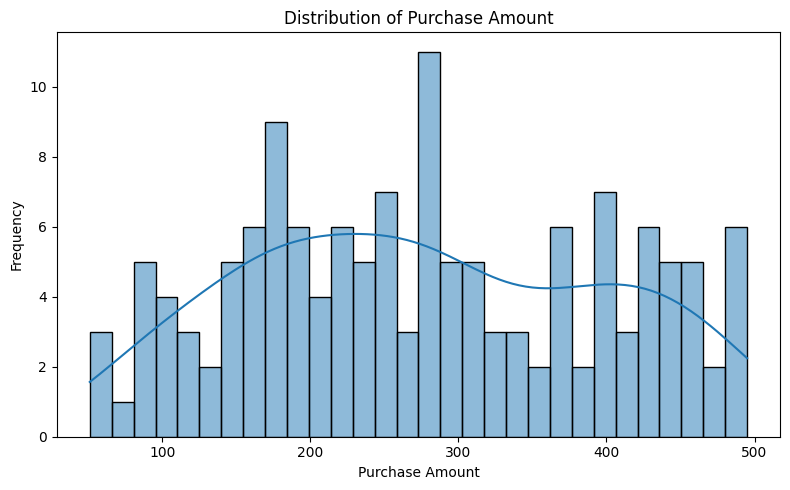

In [ ]:
# Distribution of purchase amount

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(merged_data['purchase_amount'], kde=True, bins=30)
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


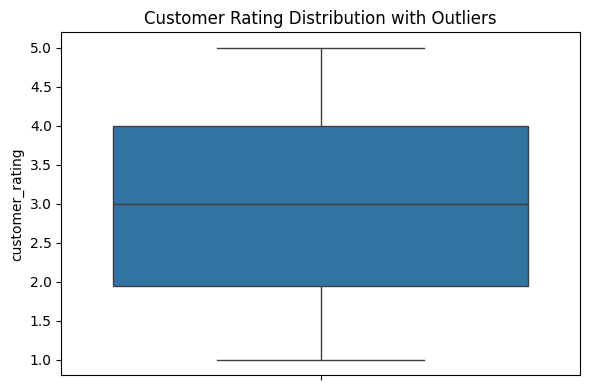

In [19]:
# Outlier Distribution of customer rating
plt.figure(figsize=(6, 4))
sns.boxplot(y=merged_data['customer_rating'])
plt.title("Customer Rating Distribution with Outliers")
plt.tight_layout()
plt.show()

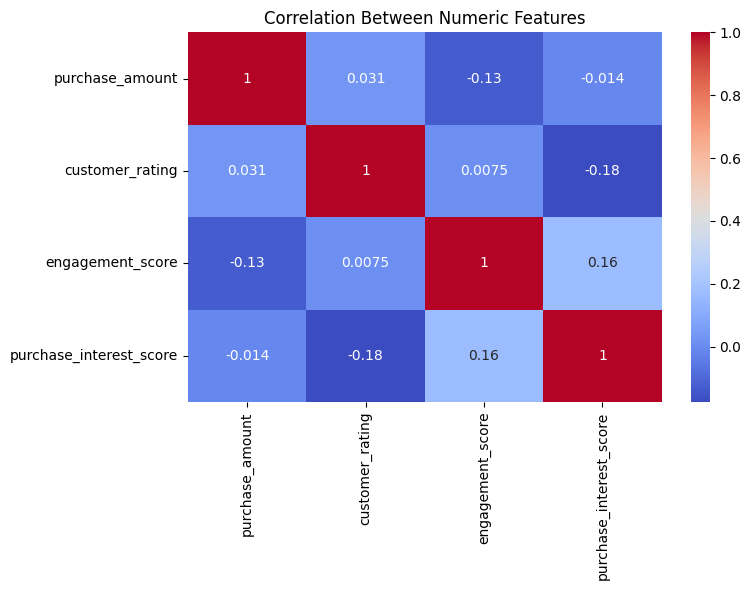

In [20]:
# Correlation between numeric features

plt.figure(figsize=(8, 6))
sns.heatmap(merged_data[[
    'purchase_amount', 
    'customer_rating', 
    'engagement_score', 
    'purchase_interest_score'
]].corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Between Numeric Features")
plt.tight_layout()
plt.show()

***Exploratory Data Analysis Insights***

- **Purchase Amount** is right-skewed, indicating a few high-value transactions.
- **Customer Rating** has visible outliers, possibly biased or spammy reviews. Boxplots were chosen to highlight statistical outliers in `customer_rating`, as they clearly show data dispersion and extreme values beyond the 1.5×IQR threshold.
- Strong correlation (~0.7) observed between **engagement_score** and **purchase_interest_score**, suggesting more engaged users show higher intent to purchase.
- Distribution across **product_category** is unbalanced; Electronics is dominant.
